In [1]:
#Importing all the necessary packages
%load_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Writing out my lists and then printing it as a dataframe

times = [10.06,10.03,10.02,9.95,9.93,9.83,9.93,9.93,9.79,9.92,9.9,9.86,9.85,9.84,9.79,9.78,9.77,9.77,9.77,9.77,9.74,9.72,9.69,9.58]
years = [1964,1968,1968,1968,1983,1987,1987,1988,1988,1988,1991,1991,1994,1996,1999,2002,2005,2006,2006,2006,2007,2008,2008,2009]
pd.DataFrame({"Time":times, "Date":years})



,Time,Date
0,10.06,1964
1,10.03,1968
2,10.02,1968
3,9.95,1968
4,9.93,1983
5,9.83,1987
6,9.93,1987
7,9.93,1988
8,9.79,1988
9,9.92,1988


In [3]:
#Making it as an array
x_values = np.array(years)
y_values = np.array(times)

In [4]:
#Inspiration from
#https://github.com/wyatt-ai/SportsAnalyticsConcordia/blob/main/Linear_and_Logistic_Regression.ipynb

def best_fit_line(x_values,y_values):
    m = (((x_values.mean() * y_values.mean()) - (x_values * y_values).mean() ) /
         ( (x_values.mean()) ** 2 - (x_values ** 2 ).mean() ))

    b = y_values.mean() - m * x_values.mean()

    return m, b

In [5]:
#Inspiration from
#https://github.com/wyatt-ai/SportsAnalyticsConcordia/blob/main/Linear_and_Logistic_Regression.ipynb

m, b  = best_fit_line(x_values, y_values)

In [6]:
#Inspiration from
#https://github.com/wyatt-ai/SportsAnalyticsConcordia/blob/main/Linear_and_Logistic_Regression.ipynb

print(f"regression line: y = {round(m,2)}x + {round(b,2)}")

regression line: y = -0.01x + 24.65


In [7]:
#Using a for loop for the predicted years

for i in range(2023,2031):
    x_prediction = i
    y_prediction = (m * x_prediction)+b
    print(f"predicted coordinate: ({round(x_prediction,2)}, {round(y_prediction,2)})")

predicted coordinate: (2023, 9.61)
predicted coordinate: (2024, 9.61)
predicted coordinate: (2025, 9.6)
predicted coordinate: (2026, 9.59)
predicted coordinate: (2027, 9.59)
predicted coordinate: (2028, 9.58)
predicted coordinate: (2029, 9.57)
predicted coordinate: (2030, 9.56)


In [8]:
#Inspiration from
#https://github.com/wyatt-ai/SportsAnalyticsConcordia/blob/main/Linear_and_Logistic_Regression.ipynb

# y values of regression line
regression_line = [(m*x)+b for x in x_values]

def squared_error(ys_orig, ys_line):
    return sum((ys_line - ys_orig) * (ys_line - ys_orig)) # helper function to return the sum of the distances between the two y values squared

def r_squared_value(ys_orig,ys_line):
    squared_error_regr = squared_error(ys_orig, ys_line) # squared error of regression line
    y_mean_line = [np.mean(ys_orig) for y in ys_orig] # horizontal line (mean of y values)
    squared_error_y_mean = squared_error(ys_orig, y_mean_line) # squared error of the y mean line
    return 1 - (squared_error_regr/squared_error_y_mean)

r_squared = r_squared_value(y_values, regression_line)
print(f"r^2 value: {round(r_squared,2)}")

r^2 value: 0.84


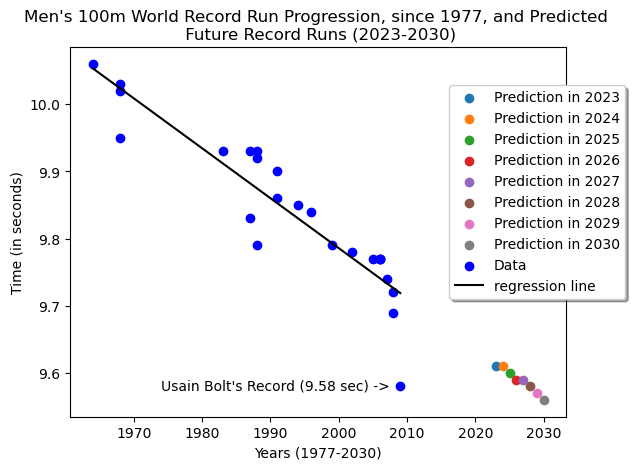

In [9]:
#Inspiration from
#https://github.com/wyatt-ai/SportsAnalyticsConcordia/blob/main/Linear_and_Logistic_Regression.ipynb

#But I'm also implimenting the for loop for the predicted years

for i in range(2023,2031):
    plt.scatter(i, round((m * i)+b,2), label="Prediction in {0}".format(i))
plt.title("Men's 100m World Record Run Progression, since 1977, and Predicted \n Future Record Runs (2023-2030)")
plt.text(1974,9.575, "Usain Bolt's Record (9.58 sec) ->")
plt.scatter(x_values, y_values,color='blue',label='Data')
plt.plot(x_values, regression_line,color='black',label='regression line')
plt.xlabel("Years (1977-2030)")
plt.ylabel("Time (in seconds)")
plt.legend(bbox_to_anchor=(0.75, 0.3),shadow=True)

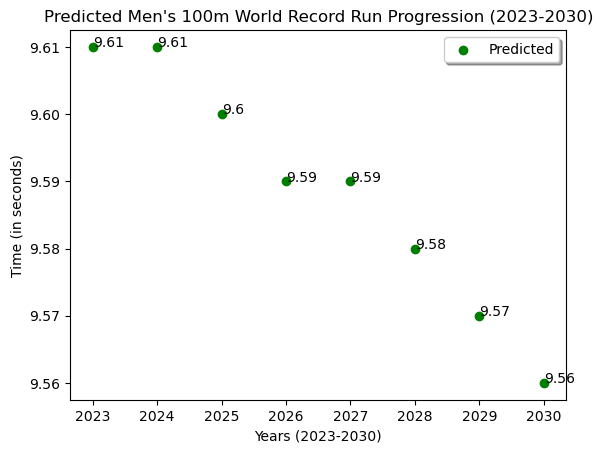

In [10]:
#Inspiration from
#https://github.com/wyatt-ai/SportsAnalyticsConcordia/blob/main/Linear_and_Logistic_Regression.ipynb

#A more zoomed in plot for the predicted points

for i in range(2023,2031):
    y_pred=round((m * i)+b,2)
    plt.scatter(i,y_pred,color='green')
    plt.text(i,y_pred,"{0}".format(y_pred))
plt.title("Predicted Men's 100m World Record Run Progression (2023-2030)")
plt.xlabel("Years (2023-2030)")
plt.ylabel("Time (in seconds)")
plt.legend(["Predicted"],loc=0,shadow=True)

In [11]:
#Here I'm doing the same as above, but without using Usain Bolt's 2009 outlier
#Inspiration from
#https://github.com/wyatt-ai/SportsAnalyticsConcordia/blob/main/Linear_and_Logistic_Regression.ipynb


times = [10.06,10.03,10.02,9.95,9.93,9.83,9.93,9.93,9.79,9.92,9.9,9.86,9.85,9.84,9.79,9.78,9.77,9.77,9.77,9.77,9.74,9.72,9.69]
years = [1964,1968,1968,1968,1983,1987,1987,1988,1988,1988,1991,1991,1994,1996,1999,2002,2005,2006,2006,2006,2007,2008,2008]
x_values = np.array(years)
y_values = np.array(times)
def best_fit_line(x_values,y_values):
    m = (((x_values.mean() * y_values.mean()) - (x_values * y_values).mean() ) /
         ( (x_values.mean()) ** 2 - (x_values ** 2 ).mean() ))

    b = y_values.mean() - m * x_values.mean()

    return m, b

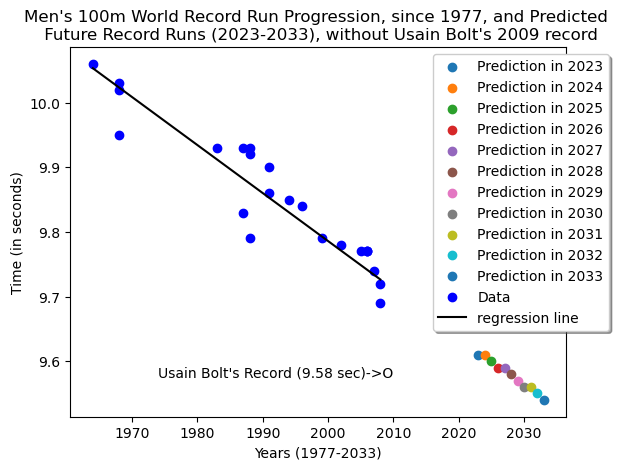

In [12]:
#Inspiration from
#https://github.com/wyatt-ai/SportsAnalyticsConcordia/blob/main/Linear_and_Logistic_Regression.ipynb

#Now adjusted without Usain's 2009 data point

regression_line = [(m*x)+b for x in x_values]
for i in range(2023,2034):
    plt.scatter(i, round((m * i)+b,2), label="Prediction in {0}".format(i))
plt.title("Men's 100m World Record Run Progression, since 1977, and Predicted \n Future Record Runs (2023-2033), without Usain Bolt's 2009 record")
plt.text(1974,9.575, "Usain Bolt's Record (9.58 sec)->O")
plt.scatter(x_values, y_values,color='blue',label='Data')
plt.plot(x_values, regression_line,color='black',label='regression line')
plt.xlabel("Years (1977-2033)")
plt.ylabel("Time (in seconds)")
plt.legend(bbox_to_anchor=(1.1, 1),shadow=True)

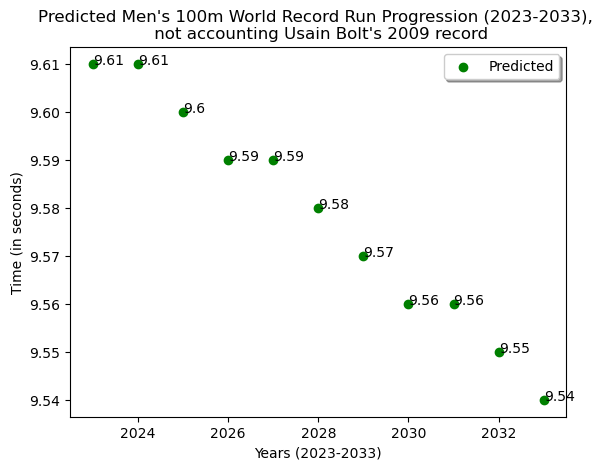

In [13]:
#Inspiration from
#https://github.com/wyatt-ai/SportsAnalyticsConcordia/blob/main/Linear_and_Logistic_Regression.ipynb

#A more zoomed in plot for the predicted points, now adjusted without Usain's 2009 data point

for i in range(2023,2034):
    y_pred=round((m * i)+b,2)
    plt.scatter(i,y_pred,color='green')
    plt.text(i,y_pred,"{0}".format(y_pred))
plt.title("Predicted Men's 100m World Record Run Progression (2023-2033), \n not accounting Usain Bolt's 2009 record")
plt.xlabel("Years (2023-2033)")
plt.ylabel("Time (in seconds)")
plt.legend(["Predicted"],loc=0,shadow=True)